# Homework 2

In this homework, I'm going to use the Ames Housing Dataset from Kaggle to predict house prices in Ames, Iowa. First, I'll import and clean the data, and then I'll use a few different models to try to get the best predictions possible.

## Part 1: Import and clean the data

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr
from sklearn import preprocessing

%matplotlib inline

train = pd.read_csv("/Users/alidoxey/Downloads/train.csv")
test = pd.read_csv("/Users/alidoxey/Downloads/test.csv")

I'll start by looking at the data as a whole: how many rows and columns does it have? What kind of features are we using to predict housing prices? What are the summary statistics for the numerical data?

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Taking out the "Id" variable (which looks like just another index for each observation) and the dependent "SalePrice" variable, I have 79 features to predict housing prices. It looks like a fair amount of them are categorical or contain missing values, so I'll have to deal with that later. 

In [4]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


It looks like SalePrice's mean is much higher than its median, meaning the data for that variable must be skewed right. I'll plot it now to see roughly how skewed it is.

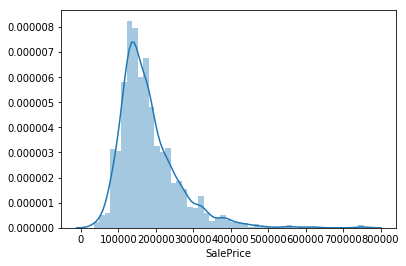

In [5]:
#graph a histogram of the housing prices in our training set
sns.distplot(train.SalePrice)

That looks really skewed. I've heard that scaling the data is sometimes (but not always) useful in modeling, so now I'll create a copy of the data with all of the numerical variables normalized.

In [8]:
#COME BACK TO THIS
train_numeric = 
train_cat = 

train_normalized = preprocessing.normalize(train_numeric)
#merge train_cat and train_normalized

ValueError: could not convert string to float: 'Normal'

Now I'll move on to dealing with missing data. Below, I have a list of all the columns as well as a count of how many values in each column are non-missing.

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

It looks like a lot of the variables have missing data. After reading the descriptions of the variables that have the most missing values, I decided to drop a couple of them since they don't seem to provide very much useful information (for example, it doesn't make sense to hold onto only seven observations for pool quality).

In [9]:
# drop all variables for which more than 50% of the rows have missing values (from reading the data description, it 
# looks like none of these variables would be essential to the analysis anyway)
train = train.drop(['Alley', 'PoolQC', 'MiscFeature', 'Fence'], axis = 1) 

# drop the 'Id' variable since it's just another index for each observation
train = train.drop(['Id'])

Now I'll check again to see how many rows have missing values after dropping these variables.

In [10]:
# check to see which rows have missing values: returns "True" if any entries in the row are missing values
train.isnull().any(axis = 1) 

0        True
1       False
2       False
3       False
4       False
5        True
6       False
7        True
8       False
9       False
10       True
11      False
12       True
13      False
14       True
15       True
16       True
17       True
18       True
19       True
20      False
21      False
22      False
23      False
24       True
25      False
26       True
27      False
28      False
29       True
        ...  
1430    False
1431     True
1432     True
1433    False
1434    False
1435    False
1436     True
1437    False
1438     True
1439    False
1440    False
1441     True
1442    False
1443     True
1444     True
1445     True
1446     True
1447    False
1448     True
1449     True
1450     True
1451    False
1452     True
1453     True
1454     True
1455    False
1456    False
1457    False
1458     True
1459     True
Length: 1460, dtype: bool

In [11]:
# returns how many rows are totally filled in (no missing values)
len(train[train.notnull().all(axis=1)])

583

Okay, so now about a third of the rows are completely filled in, but that's not nearly enough for me to drop all of the rows containing missing values. I'll have to start imputing values for the remaining missing data.

I want to impute the mean, but this won't work well for highly skewed variables. #COME BACK TO THIS

In [90]:
# find which categorical variables are most skewed and drop them
weirdly_distributed_variables = []
for i in train.columns():
    if i.dtype() == 'object':
        if   ##start here next time


In [84]:
# Fill all missing numerical values with the mean of that column
train = train.fillna(train.mean())

In [85]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non

Great! Now most of the columns are completely filled in. But why does the fireplace quality variable only have 770 non-missing values? I'll look into that and the fireplaces variable to find out.

In [86]:
train['Fireplaces'].describe()

count    1460.000000
mean        0.613014
std         0.644666
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: Fireplaces, dtype: float64

In [87]:
train['FireplaceQu'].describe()

count     770
unique      5
top        Gd
freq      380
Name: FireplaceQu, dtype: object

In [88]:
train['FireplaceQu'].unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [89]:
train["Fireplaces"].value_counts()

0    690
1    650
2    115
3      5
Name: Fireplaces, dtype: int64

Now it makes sense why only half the data has a value for fireplace quality-- it's because only half of the houses actually have a fireplace. This probably should have been obvious to me beforehand, but either way, now I know!

Next, I'll impute a value of "None" for the rest of the missing categorical data. This should work if the other variables are similar to fireplace quality (such that a missing value means that that feature does not exist for a certain house).

In [12]:
#replace all missing categorical data with "None"
train = train.fillna("None")

# can do this with the mode instead of "None"           #COME BACK TO THIS

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null object
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

No more missing values! But I've still got a lot of categorical data that I'll need to convert to numeric before I can use it for analysis. I'll try one hot encoding to add in binary variables for each category in the categorical variables.

In [23]:
train = pd.get_dummies(train)

In [24]:
train.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,0,0,1,0,0,0,0,1,0
1,2,20,9600,6,8,1976,1976,978,0,284,...,0,0,0,1,0,0,0,0,1,0
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,0,0,1,0,0,0,0,1,0
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,0,0,1,1,0,0,0,0,0
4,5,60,14260,8,5,2000,2000,655,0,490,...,0,0,0,1,0,0,0,0,1,0


From what I've heard about one hot encoding, this has the advantage of being easy to do but also adds a lot of variables to the data set (in this example, it added more than 700 additional features), which could lead to overfitting. I'll have to watch out for that in testing my models.

In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 822 entries, Id to SaleCondition_Partial
dtypes: int64(35), uint8(787)
memory usage: 1.5 MB


In [27]:
target = train.SalePrice

In [28]:
train.drop(['SalePrice'], axis = 1, inplace = True)

In [ ]:
#Another option: label encoding (see Conner's code)
#Convert rating scale of "None," "Poor," "Fair," etc. to numerical values of 0, 1, 2, ...
#train['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtQual', 'BsmtCond'] 
train_label_encoded = train['FireplaceQu', ] ## convert to numerical

SCALE THE DATA HERE IF NECESSARY ###############

## Part 2: Modeling

In [ ]:
##NOTES FOR THIS PART
#Basic Linear Regression
lin_reg = 
lin_reg.fit()
predictions = lin_reg.predict()
#export predictions
#then do everything you just did to your test set
#remember cross-validation for 80%/20% of the training data
# save predictions that your model makes, write that to a csv and submit to Kaggle

I'll start by looking at the relationship between SalePrice and a few other variables. 

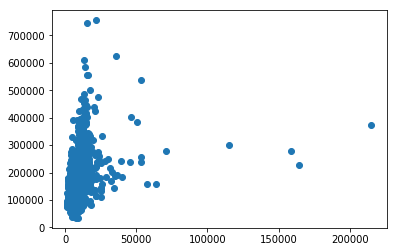

In [15]:
plt.scatter(train['LotArea'], train['SalePrice'])

It's hard to see the relationship here, so I'll try scaling the data to see if that helps.

In [16]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [32]:
scaler = StandardScaler()
scaler.fit(train)
scaled_train = scaler.transform(train)

In [34]:
scaled_train.head()   #convert this to a df

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [33]:
plt.scatter(scaled_train['LotArea'], scaled_train['SalePrice'])

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

### Model 1: Linear Regression

In [30]:
linear_regression_model = SGDRegressor(tol=.0001, eta0=.01)
linear_regression_model.fit(train, target)
predictions = linear_regression_model.predict(train)
mse = mean_squared_error(target, predictions)
#print("RMSE: {}".format(np.sqrt(mse))



#SCALED VERSION
#linear_regression_model = SGDRegressor(tol=.0001, eta0=.01)
#linear_regression_model.fit(scaled_train, target)
#predictions = linear_regression_model.predict(scaled_train)
#mse = mean_squared_error(target, predictions)    #start here
#print("RMSE: {}".format(np.sqrt(mse)))


In [31]:
predictions.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

### Submitting Results

In [ ]:
# Step 1: Save Test IDs
test_ids = test['Id']
test.drop('Id', axis=1, inplace=True)
# Step 2: Make predictions
pred = clf.predict(test)
# Step 3: Combine Test IDs and predictions
test_ids['SalePrice'] = pred
# Step 4: Save to a csv
test_ids.to_csv("submission1.csv", index = False)